In [8]:
# おまじない
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

from tensorflow import keras

from google.colab import drive
drive.mount('/content/drive')

# 各列の名称
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Names"]

# データの整理
dataset = pd.read_excel("drive/MyDrive/auto-mpg.xlsx", sheet_name=0, names=column_names)    # データの読み込み
dataset = dataset.drop("Car Names", axis=1)     # 車名の列を削除
dataset["Origin"] = dataset["Origin"].map({1: "USA", 2: "Europe", 3: "Japan"})  # 1をUSA、2をEurope、3をJapanに置換
dataset = pd.get_dummies(dataset, columns=["Origin"])   # カテゴリデータを数値データに変換

# データを学習用とテスト用に分離
train_dataset = dataset.sample(frac=0.8, random_state=0)    # 8割を学習用に
test_dataset = dataset.drop(train_dataset.index)            # 残りをテスト用に

# 説明変数と目的変数に分離
train_x = train_dataset.copy()  # train_xにtrain_datasetをコピー
test_x = test_dataset.copy()    # test_xにtest_datasetをコピー
train_y = train_x.pop("MPG")    # train_xからMPGの列を取り出しtrain_yに代入
test_y = test_x.pop("MPG")      # test_xからMPGの列を取り出しtest_yに代入

# np.array形式に変換
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

print(train_x.shape, train_y.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(314, 9) (314,)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_18 (Dense)            (None, 64)                640       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


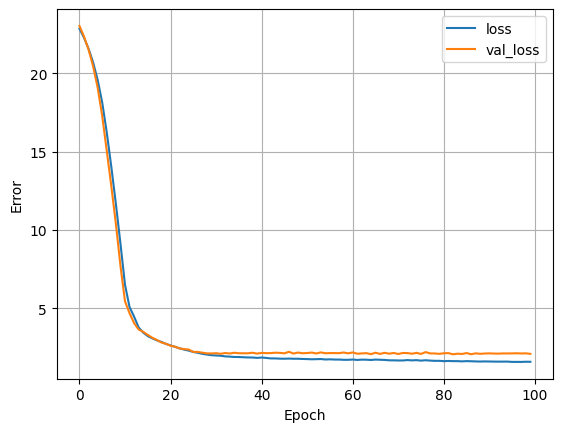

test loss = 1.656962513923645


In [10]:
### DNN回帰 ####################################################################

# 標準化層のパラメータ計算（平均および分散の計算）
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(train_x)

# モデルの定義
model = keras.Sequential([
    normalizer,                                 # 標準化層
    keras.layers.Dense(64, activation='relu'),  # 全結合層（ユニット数64）
    keras.layers.Dense(64, activation='relu'),  # 全結合層（ユニット数64）
    keras.layers.Dense(1)                       # 全結合層（出力層）
])

# 誤差関数および最適化手法の設定
model.compile(
    loss='mean_absolute_error',
    optimizer=keras.optimizers.Adam(0.001)
)
model.summary()

# 学習
history = model.fit(
    train_x,    # 燃費以外のデータ（説明変数）
    train_y,    # 燃費（目的変数）
    epochs=100, # 学習回数
    verbose=0,  # 学習進捗表示（1:表示、0:非表示）
    validation_split = 0.2  # 検証データの割合
)

# 学習結果の表示
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# モデルの評価
test_results = model.evaluate(test_x, test_y, verbose=0)
print(f"test loss = {test_results}")

In [11]:
# テストデータからの予測
i = 5                     # テストデータの番号
x = test_x[i].tolist()    # 予測に使うx
y = test_y[i]             # 正しい燃費の値
p = model.predict([x], verbose=False)[0][0]  # モデルによる予測値
print(f"{x}からモデルが予測した燃費は {p:.2f} miles/gallon, 本当は {y:.2f} miles/gallon")

# 手作りデータからの予測
x = [8, 307, 130, 3504, 12, 70, 1, 0, 0]      # 左から順に、気筒数、排気量、馬力、重さ、加速度、年式、国（アメリカ、ヨーロッパ、日本）
p = model.predict([x], verbose=False)[0][0]   # モデルによる予測値
print(f"{x}からモデルが予測した燃費は {p:.2f} miles/gallon")

[8.0, 400.0, 175.0, 4464.0, 11.5, 71.0, 0.0, 0.0, 1.0]からモデルが予測した燃費は 12.43 miles/gallon, 本当は 14.00 miles/gallon
[8, 307, 130, 3504, 12, 70, 1, 0, 0]からモデルが予測した燃費は 8.65 miles/gallon
